In [1]:
! pip install scikit-learn matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached pillow-11.1.0-cp310-cp310-win_amd64.whl (2.6 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)


You should consider upgrading via the 'F:\GitHub\HSE\cv\hw2\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


1. Подготовка данных:
    * Выберите набор данных:
        * MNIST для классификации рукописных цифр.
        * Или CIFAR-10 для классификации объектов в цветных изображениях.
    * Разделите данные на обучающую (80%) и тестовую (20%) выборки.

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загружаем MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Нормализация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Делим на обучающую и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

2. Классификация с использованием kNN или SVM:
    * Реализуйте классификатор k-ближайших соседей (kNN) или метод опорных векторов (SVM).
    * Обучите модель на обучающей выборке.
    * Предскажите классы на тестовой выборке.
    * Вычислите метрики качества: точность, полнота, F1-score.
    * Постройте матрицу ошибок (confusion matrix).

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Обучаем SVM
svm_clf = SVC(kernel='rbf', gamma='scale') 
svm_clf.fit(X_train, y_train)

# Предсказываем
y_pred = svm_clf.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.96      0.95      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.98      1396
           7       0.93      0.97      0.95      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.94      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



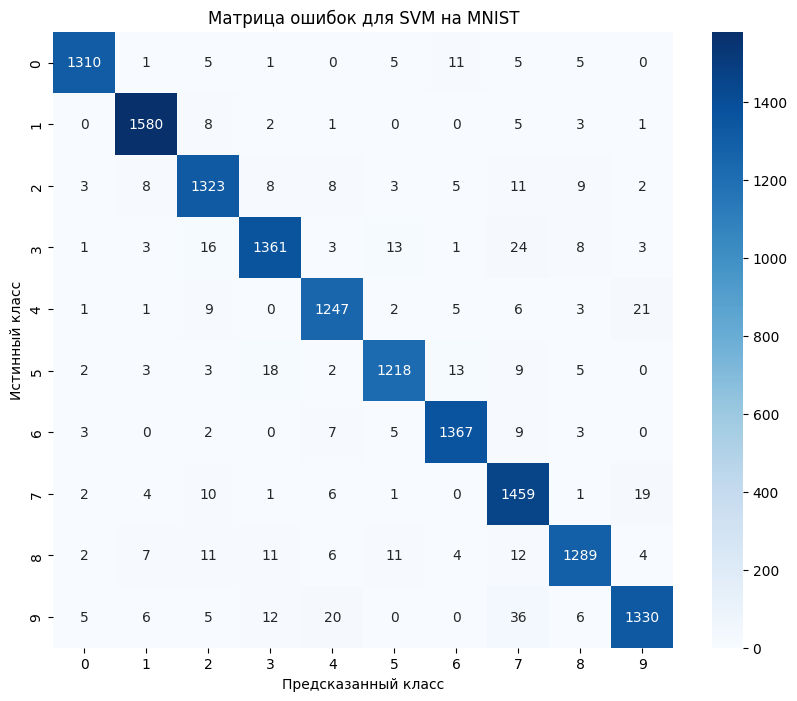

In [5]:
# Строим матрицу ошибок
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Матрица ошибок для SVM на MNIST")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.show()

3. Построение и обучение нейронной сети:
    * Создайте многослойный перцептрон (MLP) с использованием Keras или PyTorch.
    * Определите архитектуру сети (количество слоев, нейронов, функции активации).
    * Обучите модель на тех же данных.
    * Проанализируйте динамику обучения (графики потерь и точности).

In [9]:
! pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126
  Using cached https://download.pytorch.org/whl/cu126/torch-2.6.0%2Bcu126-cp310-cp310-win_amd64.whl (2496.1 MB)
  Using cached https://download.pytorch.org/whl/cu126/torchvision-0.21.0%2Bcu126-cp310-cp310-win_amd64.whl (6.1 MB)
  Using cached https://download.pytorch.org/whl/cu126/torchaudio-2.6.0%2Bcu126-cp310-cp310-win_amd64.whl (4.2 MB)


You should consider upgrading via the 'F:\GitHub\HSE\cv\hw2\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [11]:
# Трансформация: преобразуем в тензор и нормализуем
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Среднее и std для MNIST
])

# Загружаем датасет
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Делим тренировочный на train/val
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# DataLoader'ы
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100.0%
100.0%
100.0%
100.0%


In [12]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device


device(type='cuda')

In [14]:
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(10):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)

    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(correct / total)

    print(f"Epoch {epoch+1}: Train Loss={train_losses[-1]:.4f}, Val Loss={val_losses[-1]:.4f}, "
          f"Train Acc={train_accuracies[-1]:.4f}, Val Acc={val_accuracies[-1]:.4f}")

Epoch 1: Train Loss=0.3013, Val Loss=0.1651, Train Acc=0.9098, Val Acc=0.9493
Epoch 2: Train Loss=0.1265, Val Loss=0.1262, Train Acc=0.9615, Val Acc=0.9630
Epoch 3: Train Loss=0.0888, Val Loss=0.0995, Train Acc=0.9725, Val Acc=0.9705
Epoch 4: Train Loss=0.0658, Val Loss=0.1027, Train Acc=0.9792, Val Acc=0.9698
Epoch 5: Train Loss=0.0511, Val Loss=0.0924, Train Acc=0.9835, Val Acc=0.9736
Epoch 6: Train Loss=0.0426, Val Loss=0.0890, Train Acc=0.9856, Val Acc=0.9755
Epoch 7: Train Loss=0.0359, Val Loss=0.1161, Train Acc=0.9881, Val Acc=0.9680
Epoch 8: Train Loss=0.0300, Val Loss=0.1048, Train Acc=0.9897, Val Acc=0.9731
Epoch 9: Train Loss=0.0254, Val Loss=0.1068, Train Acc=0.9916, Val Acc=0.9722
Epoch 10: Train Loss=0.0236, Val Loss=0.1049, Train Acc=0.9918, Val Acc=0.9738


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



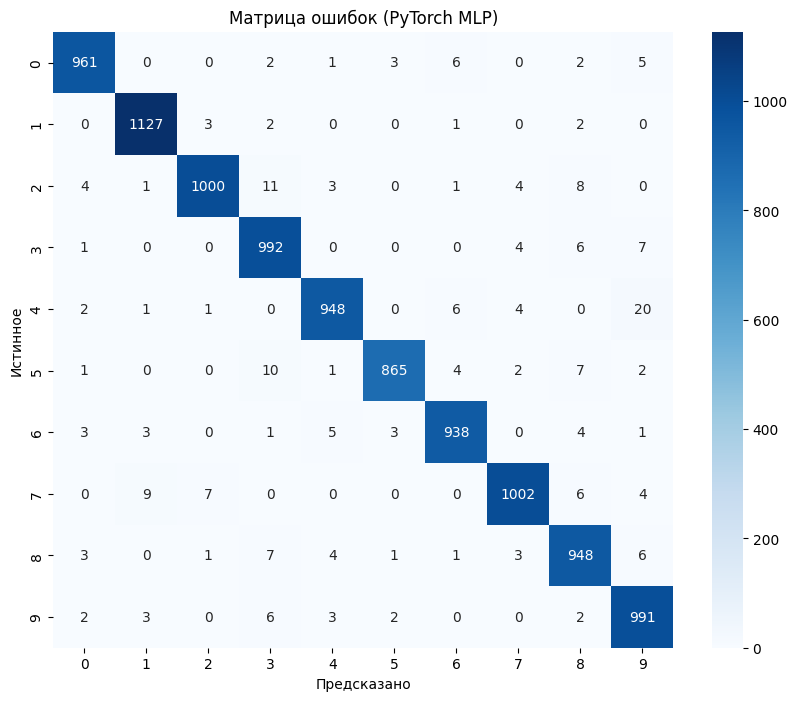

In [15]:
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

print(classification_report(all_labels, all_preds))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Матрица ошибок (PyTorch MLP)")
plt.xlabel("Предсказано")
plt.ylabel("Истинное")
plt.show()

4. Сравнительный анализ моделей:
    * Сравните результаты классического алгоритма (kNN/SVM) и нейронной сети.
    * Обсудите преимущества и недостатки каждого подхода.
    * Предложите способы улучшения моделей.

In [16]:
def plot_confusion(title, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Предсказано")
    plt.ylabel("Истинное")
    plt.show()

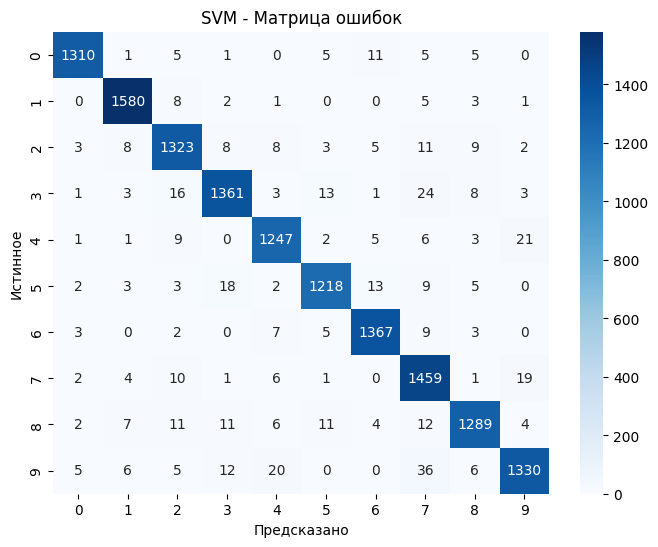

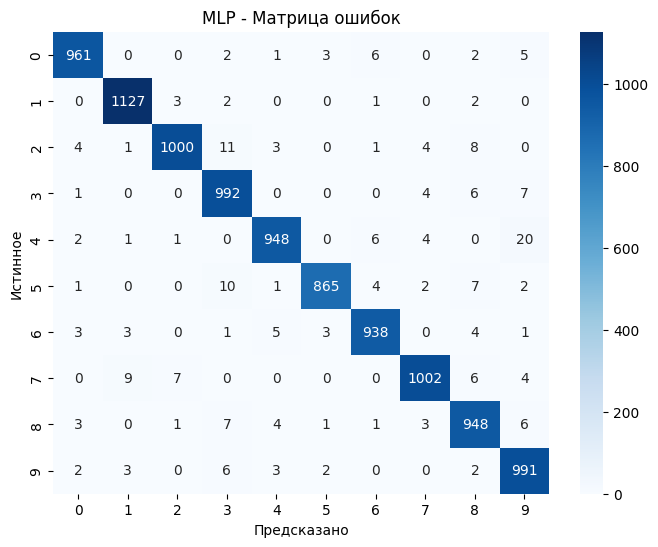

In [18]:
plot_confusion("SVM - Матрица ошибок", y_test, y_pred)
plot_confusion("MLP - Матрица ошибок", all_labels, all_preds)

## Сравнение методов классификации

| Метод          | Преимущества                                                                 | Недостатки                                                                |
|----------------|------------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **SVM**        | - Высокая точность на небольших и средних наборах данных                     | - Медленно обучается на больших выборках                                 |
|                | - Хорошо работает при ограниченном числе признаков                           | - Плохо масштабируется при увеличении объема данных                      |
|                | - Прост в интерпретации (особенно с линейным ядром)                          | - Необхоидмо тщательное задание параметров ядра (`C`, `gamma`, `kernel`) |
| **MLP (PyTorch)** | - Гибкая архитектура: можно адаптировать под задачу                        | - Требует подбора гиперпараметров и архитектуры                          |
|                | - Быстрое предсказание после обучения (подходит для реального времени)       | - Возможность переобучения без регуляризации                             |
|                | - Эффективная реализация на GPU                                              | - Меньше интерпретируемости по сравнению с классическими методами        |
|                | - Легко масштабируется под большие данные                                    |                                                                           |
